In [4]:
from astropy.io import fits
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt
import pandas
from HERA_MapMaking_VisibilitySimulation import DATA_PATH

### Loading table

In [2]:
file_path = DATA_PATH + '/GLEAM_catalog/GLEAM_EGC_v2.fits'
data_gleam = fits.open(file_path)

In [3]:
cols = data_gleam[1].columns
cols

ColDefs(
    name = 'Name'; format = '20A'
    name = 'background_wide'; format = 'E'; unit = 'Jy/beam'
    name = 'local_rms_wide'; format = 'E'; unit = 'Jy/beam'
    name = 'ra_str'; format = '11A'; unit = 'h:m:s'
    name = 'dec_str'; format = '12A'; unit = 'd:m:s'
    name = 'RAJ2000'; format = 'E'; unit = 'deg'
    name = 'err_RAJ2000'; format = 'D'; unit = 'deg'
    name = 'DEJ2000'; format = 'E'; unit = 'deg'
    name = 'err_DEJ2000'; format = 'D'; unit = 'deg'
    name = 'peak_flux_wide'; format = 'E'; unit = 'Jy/beam'
    name = 'err_peak_flux_wide'; format = 'E'; unit = 'Jy/beam'
    name = 'int_flux_wide'; format = 'E'; unit = 'Jy'
    name = 'err_int_flux_wide'; format = 'E'; unit = 'Jy'
    name = 'a_wide'; format = 'E'; unit = 'arcsec'
    name = 'err_a_wide'; format = 'E'; unit = 'arcsec'
    name = 'b_wide'; format = 'E'; unit = 'arcsec'
    name = 'err_b_wide'; format = 'E'; unit = 'arcsec'
    name = 'pa_wide'; format = 'E'; unit = 'deg'
    name = 'err_pa_wide'; form

In [4]:
table = data_gleam[1].data
table.shape

(307455,)

In [5]:
df = pandas.DataFrame(table)

In [6]:
s_n_peak = df['peak_flux_wide']/df['err_peak_flux_wide']
s_n_int = df['int_flux_wide']/df['err_int_flux_wide']
np.min(s_n_int), np.max(s_n_int)

(0.00022252277, 1963.0104)

In [7]:
df = df.assign(S_N_peak=s_n_peak)
df = df.assign(S_N_int=s_n_int)

### Limiting to HERA stripe

In [8]:
RA_min, RA_max, DEC_min, DEC_max = 0.082722, 178.681, -40.7215, -20.7215

In [9]:
idx_hera = (df['DEJ2000'] < DEC_max) * (df['DEJ2000'] > DEC_min) * (df['RAJ2000'] > RA_min) * (df['RAJ2000'] < RA_max)
df_hera = df[idx_hera]
df_hera = df_hera.reset_index(drop=True)
df_hera.shape

/Users/JianshuLi/anaconda3/envs/Cosmology-Python27/lib/python2.7/site-packages/pandas/core/computation/expressions.py:179: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


(48344, 313)

In [10]:
df.shape, df_hera.shape

((307455, 313), (48344, 313))

In [11]:
df_hera[['background_wide','local_rms_wide','RAJ2000','DEJ2000','peak_flux_wide','err_peak_flux_wide','int_flux_wide','err_int_flux_wide','S_N_peak','S_N_int']][:20]

,background_wide,local_rms_wide,RAJ2000,DEJ2000,peak_flux_wide,err_peak_flux_wide,int_flux_wide,err_int_flux_wide,S_N_peak,S_N_int
0,-0.000982,0.008774,0.119508,-40.506870,0.094578,0.008399,0.109384,0.011530,11.261089,9.486576
1,-0.001094,0.008599,0.571476,-40.642639,0.142913,0.008333,0.144749,0.009852,17.150114,14.692677
2,-0.001168,0.008620,0.503950,-40.626659,0.045020,0.008623,0.042835,0.010702,5.220675,4.002692
3,-0.000798,0.008878,0.234469,-40.369705,0.227445,0.008585,0.234765,0.016227,26.493351,14.467161
4,-0.001801,0.008378,0.596619,-40.364971,0.267312,0.008129,0.273210,0.009640,32.883892,28.341465
5,-0.001956,0.008427,0.990460,-40.547310,0.653633,0.008116,0.687553,0.010093,80.535782,68.124649
6,-0.001033,0.008838,0.182138,-40.165405,0.045726,0.008904,0.049051,0.012914,5.135550,3.798191
7,-0.002052,0.008503,0.506755,-40.255211,0.709618,0.008341,0.698791,0.009667,85.075981,72.288605
8,-0.001878,0.008210,1.659986,-40.715488,0.045136,0.008200,0.049236,0.011788,5.504063,4.176848
9,-0.001876,0.008617,0.331845,-40.097149,0.060432,0.008512,0.061511,0.011485,7.099921,5.355986


Text(0,0.5,u'#')

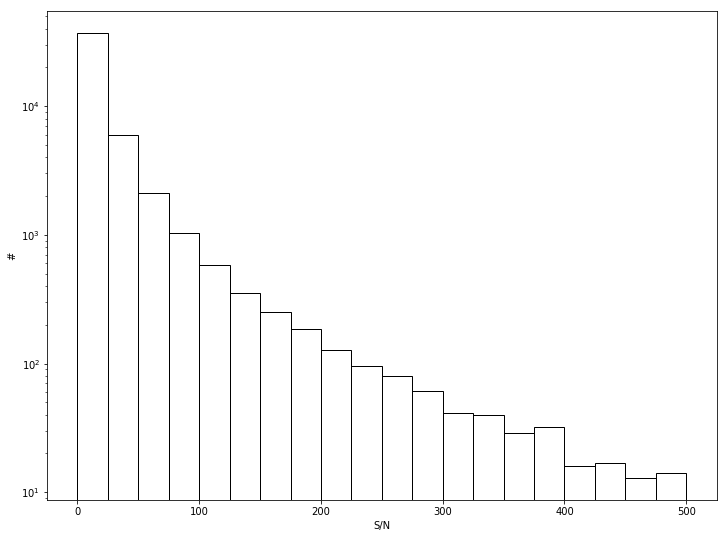

In [12]:
plt.figure(figsize=(12,9))
plt.hist(df_hera['S_N_int'], bins=20, range=[0,500], log=True, fill=False)
plt.xlabel('S/N')
plt.ylabel('#')

### Adding Fornax A

In [13]:
#RA_FornaxA, DEC_FornaxA = 50.673825, -37.208227
RA_FornaxA, DEC_FornaxA = 50.748493, -37.719580
RA_FornaxA, DEC_FornaxA

(50.748493, -37.71958)

In [14]:
# S_189 = 519 pm 26 (Bernardi et al. 2013)
df_hera = df_hera.append({'Name': 'Fornax A', 'RAJ2000': RA_FornaxA, 'DEJ2000': DEC_FornaxA, 'int_flux_wide': 519., 'err_int_flux_wide': 26}, ignore_index=True)

### Selecting bright sources

In [15]:
idx_source = df_hera['int_flux_wide'] > 5
df_bright = df_hera[idx_source]
df_bright = df_bright.sort_values(by=['int_flux_wide'], ascending=False).reset_index(drop=True)

In [16]:
df_bright[['Name','background_wide','local_rms_wide','RAJ2000','DEJ2000','peak_flux_wide','err_peak_flux_wide','int_flux_wide','err_int_flux_wide','S_N_peak','S_N_int']]

,Name,background_wide,local_rms_wide,RAJ2000,DEJ2000,peak_flux_wide,err_peak_flux_wide,int_flux_wide,err_int_flux_wide,S_N_peak,S_N_int
0,Fornax A,NaN,NaN,50.748493,-37.719580,NaN,NaN,519.000000,26.000000,NaN,NaN
1,GLEAM J052257-362727,-0.001519,0.021729,80.741081,-36.457577,47.969376,0.021221,47.613247,0.024255,2260.446289,1963.010376
2,GLEAM J044437-280948,0.004333,0.016633,71.155449,-28.163597,28.049866,0.015949,30.928867,0.020332,1758.681885,1521.180542
3,GLEAM J090147-255516,0.003568,0.014141,135.447449,-25.921137,25.596071,0.013830,25.610060,0.015972,1850.710449,1603.460815
4,GLEAM J002549-260211,-0.000173,0.012085,6.454782,-26.036501,19.575825,0.012377,17.666073,0.012800,1581.625122,1380.119141
5,GLEAM J035140-274354,-0.003171,0.016477,57.917320,-27.731697,10.020775,0.014614,16.066866,0.027734,685.682922,579.321472
6,GLEAM J013411-362913,0.003484,0.013339,23.548635,-36.487156,5.673209,0.010679,15.223774,0.033484,531.265686,454.658752
7,GLEAM J020012-305324,-0.001735,0.010846,30.050053,-30.890074,16.461348,0.010805,14.829072,0.011188,1523.441528,1325.478882
8,GLEAM J062707-352908,0.001827,0.009687,96.780914,-35.485802,10.576077,0.009112,13.883532,0.013973,1160.646606,993.598267
9,GLEAM J045514-300646,-0.001444,0.010487,73.809814,-30.112801,13.053920,0.010348,13.878118,0.012685,1261.506836,1094.093506


### Plotting sources over a map

In [18]:
sky_map = np.load(DATA_PATH + '/ring_map_{}_IDR2_1.npy'.format('xx'))

In [19]:
sky_map.shape

(1024, 64, 447)

In [20]:
sky_map_med = np.nanmedian(sky_map,axis=0)
sky_map_med.shape

/Users/JianshuLi/anaconda3/envs/Cosmology-Python27/lib/python2.7/site-packages/numpy/lib/nanfunctions.py:908: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)
/Users/JianshuLi/anaconda3/envs/Cosmology-Python27/lib/python2.7/site-packages/numpy/lib/shape_base.py:380: ComplexWarning: Casting complex values to real discards the imaginary part
  buff[ind] = asanyarray(func1d(inarr_view[ind], *args, **kwargs))


(64, 447)

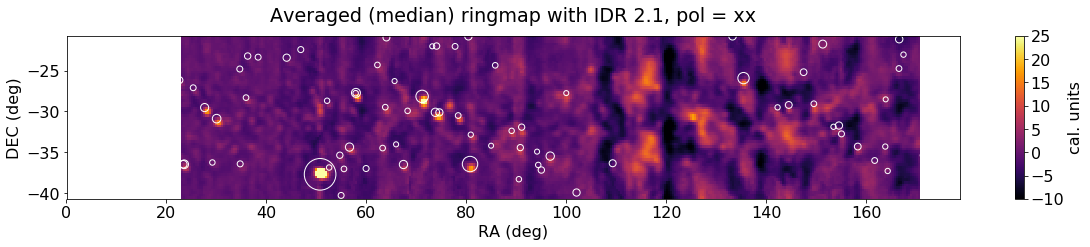

In [22]:
from matplotlib import cm
from matplotlib import rcParams
import matplotlib.pyplot as plt
rcParams.update({'font.size': 16})
plt.figure(figsize=(20, 3))
vmin, vmax = [-10,25]
plt.imshow(np.flipud(sky_map_med).real, aspect='auto', interpolation='nearest', cmap=cm.inferno,
          extent=[RA_min, RA_max, DEC_min, DEC_max], vmin=vmin, vmax=vmax)
plt.xlabel('RA (deg)')
plt.ylabel('DEC (deg)') 
plt.yticks(range(-40, -20, 5))
cb = plt.colorbar()
cb.set_label('cal. units')
plt.title('Averaged (median) ringmap with IDR 2.1, pol = %s' %('xx'), y=1.05)

marker_size = df_bright['int_flux_wide']*5
marker_size[0] = 1000 # Fornax A
plt.scatter(df_bright['RAJ2000'], df_bright['DEJ2000'], s=marker_size, facecolors='none', edgecolors='w')
plt.xlim(RA_min,RA_max)
plt.ylim(DEC_min,DEC_max)
plt.savefig('/Users/JianshuLi/Downloads/ringmap_IDR_2.1_w_GLEAMv2.png', bbox_inches = "tight")